# Linera Regression & Redge Regression

# Import libraries

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score

## Load data & Exploratory  

In [2]:
df=pd.read_csv("cardekho.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
df.shape

(8128, 12)

In [4]:
df.dtypes.T

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.00,2015.0,2017.00,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.00,450000.0,675000.00,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.00,60000.0,98000.00,2360457.0
mileage(km/ltr/kg),7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
seats,7907.0,5.416719,0.959588,2.0,5.00,5.0,5.00,14.0


In [7]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

## extract number from max_power

In [8]:
df["max_power"] = df["max_power"].str.extract(r'([\d.]+)')
df["max_power"]=df["max_power"].astype(float)


In [9]:
df.isnull().sum()


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             216
seats                 221
dtype: int64

## Handling Missing_value

In [10]:
fillNull=["mileage(km/ltr/kg)","engine","max_power","seats"]
for i in fillNull:
    df[i]=df[i].fillna(df[i].median())


In [11]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

## Handling dubicated values

In [12]:
print(f"Before drop_duplicate values : { df.duplicated().sum()}")


Before drop_duplicate values : 1202


In [13]:
df.drop_duplicates(inplace=True)
print(f"After drop_duplicate values :{df.duplicated().sum()}")



After drop_duplicate values :0


## Standarlization

In [14]:
Standarlised_list=["name","transmission","fuel","seller_type","owner"]
for i in Standarlised_list:
    df[i]=df[i].str.upper()
    
    df[i]=df[i].str.replace(r'[^A-Z0-9\s]','',regex=True)
    

In [15]:
print(df.columns.tolist())


['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']


## Handling outliear

In [16]:
out = [
    "selling_price",
    "km_driven",
    "mileage(km/ltr/kg)",
    "max_power","seats","year"
]

for col in out:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[df[col].between(lower, upper)]


In [17]:
encode=["seller_type","transmission","fuel","owner"]
df=pd.get_dummies(df,columns=encode,drop_first=True)

In [18]:
x = df.drop(["selling_price","name"], axis=1)
y = df["selling_price"]                

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [19]:
numeric_col=["mileage(km/ltr/kg)","km_driven","engine","max_power","seats","year"]
scaler=StandardScaler()

x_train[numeric_col]=scaler.fit_transform(x_train[numeric_col])
x_test[numeric_col]=scaler.transform(x_test[numeric_col])


# Linear Regression

In [20]:
lr_model=LinearRegression()

lr_model.fit(x_train,y_train)

y_pred=lr_model.predict(x_test)

Mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

lr_rmse = np.sqrt(Mse)


print("Linear Regression:")
print(f"Mean Squared Error (MSE): {Mse:.2f}")
print("Linear Regression RMSE :", lr_rmse)
print(f"R-squared (R2): {r2:.2f}")


Linear Regression:
Mean Squared Error (MSE): 12559796756.73
Linear Regression RMSE : 112070.49904737018
R-squared (R2): 0.76


## Ridge Regression

In [21]:

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

ridge_y_pred = ridge.predict(x_test)


ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print("====== Model Comparison ======")
print("Linear Regression MSE :", Mse)
print("Linear Regression RMSE :", lr_rmse)
print("Linear Regression R2  :", r2)

print("--------------------------------")
print("Ridge Regression MSE  :", ridge_mse)
print("Ridge Regression RMSE  :", ridge_rmse)
print("Ridge Regression R2 :", ridge_r2)

====== Model Comparison ======
Linear Regression MSE : 12559796756.726599
Linear Regression RMSE : 112070.49904737018
Linear Regression R2  : 0.7563546565661843
--------------------------------
Ridge Regression MSE  : 12557083006.804228
Ridge Regression RMSE  : 112058.3910593233
Ridge Regression R2 : 0.7564073001355538


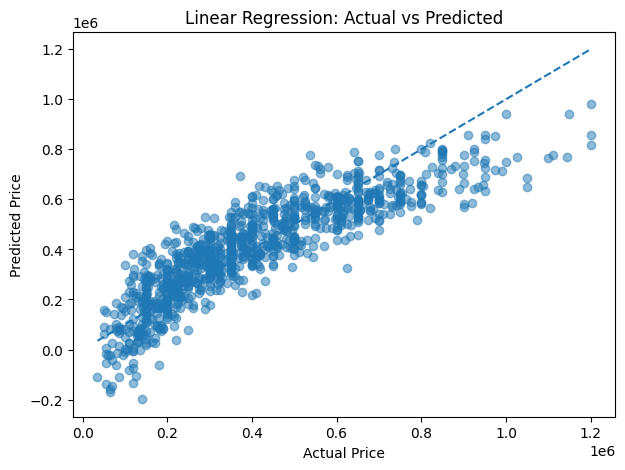

In [22]:

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


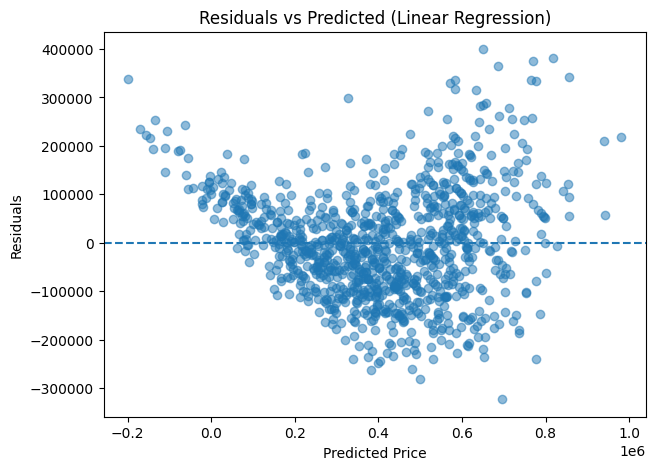

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linear Regression)")
plt.show()


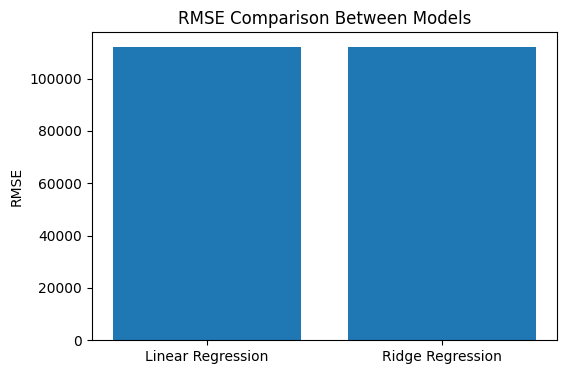

In [24]:
models = ["Linear Regression", "Ridge Regression"]
rmse_values = [lr_rmse, ridge_rmse]

plt.figure(figsize=(6,4))
plt.bar(models, rmse_values)
plt.ylabel("RMSE")
plt.title("RMSE Comparison Between Models")
plt.show()


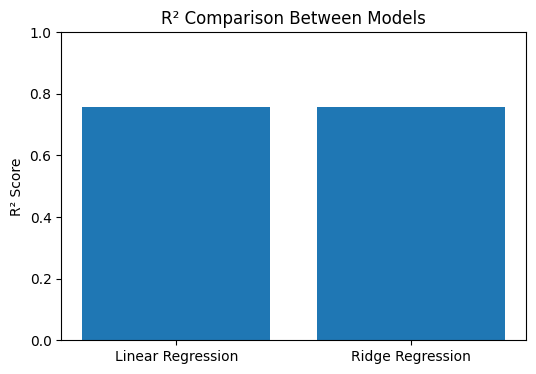

In [25]:
models = ["Linear Regression", "Ridge Regression"]
r2_values = [r2, ridge_r2]

plt.figure(figsize=(6,4))
plt.bar(models, r2_values)
plt.ylabel("R² Score")
plt.title("R² Comparison Between Models")
plt.ylim(0,1)   # عشان مقياس R²
plt.show()


From the comparison results, Ridge Regression slightly outperforms Linear Regression by achieving a lower RMSE and a higher R² score. 
Therefore, Ridge Regression is considered the most suitable model for predicting car prices in this dataset.
